Puntos de equilibrio y su clasificación:
Punto de equilibrio: 0.00000, Clasificación: Repulsora
Punto de equilibrio: -0.00000, Clasificación: Repulsora
Punto de equilibrio: -0.00000, Clasificación: Repulsora
Punto de equilibrio: -0.00000, Clasificación: Repulsora
Punto de equilibrio: -0.00000, Clasificación: Repulsora
Punto de equilibrio: -0.00000, Clasificación: Repulsora
Punto de equilibrio: 0.00000, Clasificación: Repulsora
Punto de equilibrio: 0.00000, Clasificación: Repulsora
Punto de equilibrio: 0.00000, Clasificación: Repulsora
Punto de equilibrio: 0.00000, Clasificación: Repulsora
Punto de equilibrio: 0.00000, Clasificación: Repulsora
Punto de equilibrio: -0.00000, Clasificación: Repulsora
Punto de equilibrio: 0.00000, Clasificación: Repulsora
Punto de equilibrio: 0.00000, Clasificación: Repulsora
Punto de equilibrio: 0.00000, Clasificación: Repulsora
Punto de equilibrio: -0.00000, Clasificación: Repulsora
Punto de equilibrio: -0.00000, Clasificación: Repulsora
Punto de equilib

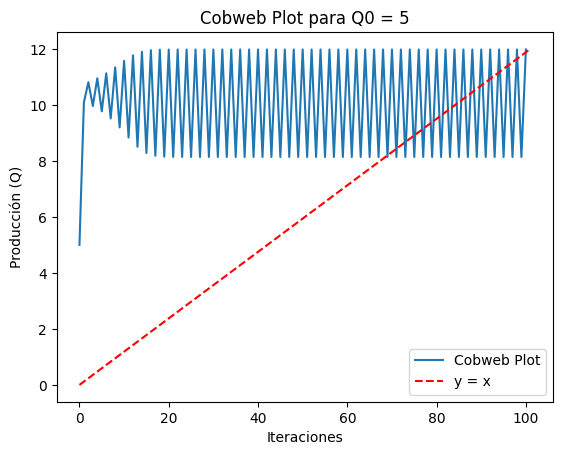

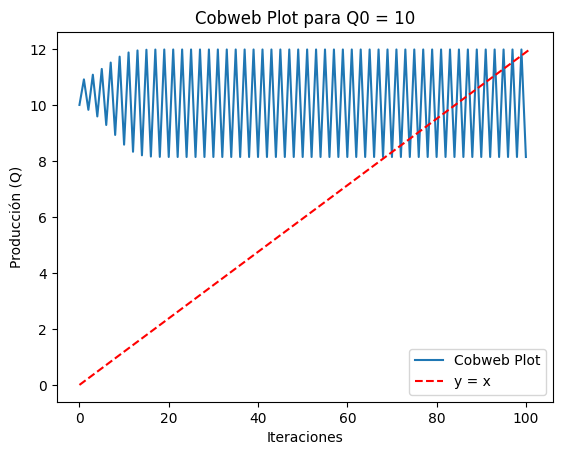

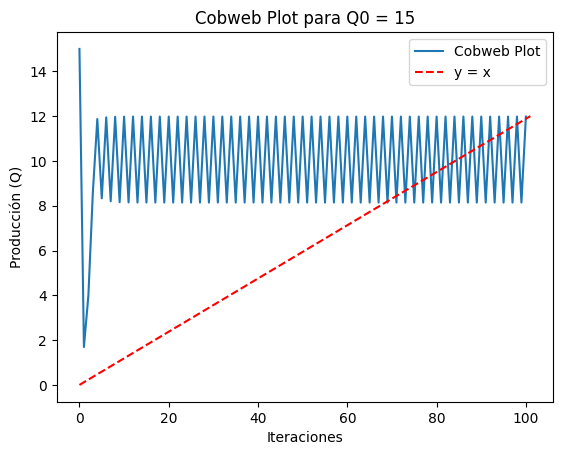

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Definimos los parámetros
D = 12
C = 5

# Definimos la función de producción
def produccion(Q_prev):
    return D * np.sin(Q_prev / C)

# Definimos la derivada de la función de producción
def derivada_produccion(Q_prev):
    return (D / C) * np.cos(Q_prev / C)

# Método de Newton-Raphson para encontrar los puntos de equilibrio
def encontrar_equilibrio(f, df, x0, tol=1e-5, max_iter=1000):
    x = x0
    for i in range(max_iter):
        fx = f(x) - x
        dfx = df(x) - 1
        x_new = x - fx / dfx
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    raise ValueError("No se encontró el equilibrio")

# Buscar puntos de equilibrio en el intervalo [0, 5pi]
intervalo = np.linspace(0, 5 * np.pi, 100)
puntos_equilibrio = []
for x0 in intervalo:
    try:
        eq = encontrar_equilibrio(produccion, derivada_produccion, x0)
        if eq not in puntos_equilibrio:
            puntos_equilibrio.append(eq)
    except ValueError:
        pass

# Clasificación de los equilibrios
def clasificar_equilibrio(eq):
    dfeq = derivada_produccion(eq)
    if abs(dfeq) < 1:
        return 'Atractora'
    else:
        return 'Repulsora'

clasificacion_equilibrios = [(eq, clasificar_equilibrio(eq)) for eq in puntos_equilibrio]

# Verificar la existencia de órbitas periódicas de periodo 2
def verificar_orbitas_periodicas(f, df, eq):
    f_eq = f(eq)
    if f_eq != eq:
        dfeq = df(eq) * df(f_eq)
        if abs(dfeq) < 1:
            return 'Atractora'
        else:
            return 'Repulsora'
    return None

orbitas_periodicas = [(eq, verificar_orbitas_periodicas(produccion, derivada_produccion, eq)) for eq in puntos_equilibrio]

# Analizar la producción a largo plazo usando cobweb plots
def cobweb_plot(f, x0, n_iter=100):
    x = [x0]
    for _ in range(n_iter):
        x.append(f(x[-1]))
    return x

x0_values = [5, 10, 15]

# Ejecución del script
if __name__ == "__main__":
    print("Puntos de equilibrio y su clasificación:")
    for eq, clasif in clasificacion_equilibrios:
        print(f"Punto de equilibrio: {eq:.5f}, Clasificación: {clasif}")

    print("\nÓrbitas periódicas de periodo 2:")
    for eq, orbita in orbitas_periodicas:
        if orbita:
            print(f"Órbita periódica en: {eq:.5f}, Clasificación: {orbita}")

    for x0 in x0_values:
        x_vals = cobweb_plot(produccion, x0)
        plt.figure()
        plt.plot(x_vals, label='Cobweb Plot')
        plt.plot([0, len(x_vals)], [0, 12], 'r--', label='y = x')
        plt.xlabel('Iteraciones')
        plt.ylabel('Producción (Q)')
        plt.title(f'Cobweb Plot para Q0 = {x0}')
        plt.legend()
        plt.show()
